# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
display(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
display(data.groupby('income_type')['days_employed'].agg('median'))

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
print(data['children'].unique())

[1 0 3 2 4 5]


### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
display(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
print(f'Количество строк-дубликатов: {data.duplicated().sum()}')

Количество строк-дубликатов: 71


In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Напишем функции, которые потребуются для выполнения однотипных действий во всех вопросах исследования.

Во-первых, создадим функцию для построения сводной таблицы.
В качестве параметров будет передаваться датафрейм и наименование столбца, по категориям которого нужно подсчитать долю должников, а в качестве результата будет возвращаться сводная таблица с информацией сколько по этому параметру 'Всего кредитополучателей', 'Всего должников' и какая 'Доля должников'.

In [22]:
# функция для построения сводной таблицы с подсчетом доли должников

def create_pivot_table(df, column):
    #создаем сводную таблицу с аггрегацией заемщиков по общему количеству, по количеству задолженников, и по доле задолженников
    pivot_table = df.pivot_table(index=column, values='debt', aggfunc=('count','sum','mean'))
    #переименовываем столбцы в более подходящие по смыслу названия
    pivot_table = pivot_table.rename(columns={'count': 'total', 'sum' : 'number_of_debtors', 'mean' : 'share_of_debtors'})
    #расставляем столбцы в нужной нам последовательности
    pivot_table = pivot_table[['total','number_of_debtors','share_of_debtors']]
    #преобразовываем в целочисленные значения столбцы с количеством заемщиков и задолженников
    pivot_table[['total', 'number_of_debtors']] = pivot_table[['total', 'number_of_debtors']].astype(int)
    #сортируем по возрастанию доли должников
    pivot_table = pivot_table.sort_values(by='share_of_debtors')
    #возвращаем результат в виде сводной таблицы
    return pivot_table

Во-вторых, сделаем функцию для вывода информации, чтобы доля должников печаталась в виде процентов, и имена столбцов отражались на русском языке.

In [23]:
# функция для вывода информации из сводной таблицы с информацией о доли должников

def display_debt_pivot(df_pivot):
    #переименовываем столбцы для отражения их на русском языке
    print_pivot = df_pivot.rename(columns={'total' : 'Всего заемщиков', 'number_of_debtors' : 'Всего должников', 'share_of_debtors' : 'Доля должников'})
    #выводим сводную таблицу, указывая долю должников в виде процентов с точностью до двух знаков после запятой
    display(print_pivot.style.format(formatter={('Доля должников'): "{:.2%}"}))    

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Посмотрим распределение заёмщиков по количеству детей

In [24]:
# количество заёмщиков в разрезе количества детей
print(data.groupby('children')['children'].count())

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


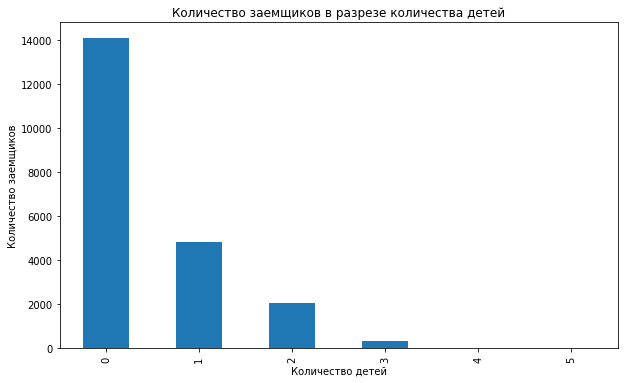

In [25]:
#график: количество заёмщиков в разрезе количества детей
fig, ax = plt.subplots(figsize=(10,6))
data.groupby('children')['children'].count().plot.bar()
ax.set_title('Количество заемщиков в разрезе количества детей')
ax.set_ylabel('Количество заемщиков')
ax.set_xlabel('Количество детей')
plt.show()

Большинство заемщиков не имеют детей.

Среди семей с детьми довольно малое количество с 4 и 5 детьми, и возможно в последующем следует объединить семьи с 3, 4 и 5 детьми в общую категорию "многодетные".

Найдём какой процент заёмщиков имел просроченную задолженность, в зависимости от количества детей в семье:

In [26]:
# воспользуемся ранее созданной функцией для подсчета доли должников
# передаем функции наш датафрейм и столбец 'children', по которому считаем долю должников 
children_pivot = create_pivot_table(data, 'children')

In [27]:
#выводим информацию при помощи ранее объявленной функции display_debt_pivot
display_debt_pivot(children_pivot)

,Всего заемщиков,Всего должников,Доля должников
children,,,
5,9,0,0.00%
0,14091,1063,7.54%
3,330,27,8.18%
1,4808,444,9.23%
2,2052,194,9.45%
4,41,4,9.76%


Отметим, что у клиентов без детей наблюдается наименьший процент случаев задолженности. Меньше на 1,7 - 1,9 процентных пункта, чем у заёмщиков с одним и двумя детьми, и на 2,2 п.п. чем у семей с четырьмя детьми.

У заёмщиков с 3-мя детьми процент возникновения задолженности всего лишь на 0,6 п.п. больше, чем у бездетных клиентов. У заёмщиков с 5-ю детьми отмечен нулевой процент просрочек, но так как количество таких семей минимально и на порядки отличается от других категорий, то даже появление единичного случая просрочки приведёт к существенному изменению доли клиентов с задолженностью в данной категории.

Объединим в одну категорию клиентов с тремя и более детьми:

In [28]:
# функция для выделения категорий в зависимости от количества детей
def categorize_children(row):
    try:
        if row == 0:
            return 'без детей'
        elif row == 1:
            return 'один ребёнок'
        elif row == 2:
            return 'двое детей'
        elif row >= 3:
            return 'многодетные'
    except:
        return 'нет категории'

In [29]:
# добавляем колонку с категориями по числу детей
data['children_category'] = data['children'].apply(categorize_children)

In [30]:
# посчитаем долю тех, кто имел задолженность
children_category_pivot = create_pivot_table(data, 'children_category')

In [31]:
# выводим результат
display_debt_pivot(children_category_pivot)

,Всего заемщиков,Всего должников,Доля должников
children_category,,,
без детей,14091,1063,7.54%
многодетные,380,31,8.16%
один ребёнок,4808,444,9.23%
двое детей,2052,194,9.45%


**Вывод:** 

Доля заемщиков, имевших задолженность, на 1,7 - 2,2 процентных пункта ниже у семей без детей, по сравнению с семьями с одним, двумя или четырьмя детьми, и на 0,6 п.п ниже, чем у семей с тремя детьми.

Поэтому можно сделать вывод, что **заемщики, у которых нет детей, возвращают кредит в срок чаще, чем заёмщики с детьми.**

У заёмщиков с 5-ю детьми отмечен нулевой процент просрочек, но так как количество таких семей минимально и на порядки отличается от других категорий, то даже появление единичного случая задержки платежа по кредиту приведёт к существенному изменению доли клиентов с задолженностью в данной категории. Видимо более корректно объединить семьи с 3, 4 и 5-ю детьми в общую категорию. 

Выделив категорию "многодетные", определили, что по уровню доли просрочек она немного, на 0,6 п.п, уступает семьям без детей, и более дисциплинирована по сравнению с клиентами с одним или двумя детьми, у которых наблюдается самая высокая доля случаев возникновения задолженности.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
# Посмотрим уникальные значения в столбцах с семейным статусом
print(data['family_status'].unique())

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


In [33]:
# и также проверим какие значения возможны для  family_status_id
print(data['family_status_id'].unique())

[0 1 2 3 4]


Сгруппируем клиентов по семейному статусу и отсортируем по убыванию количества клиентов в определённом статусе

In [34]:
print(data.groupby('family_status')['family_status'].count().sort_values(ascending=False))

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64


Среди заёмщиков большинство женаты или находятся в гражданском браке.

Найдем для какой доли клиентов в каждой категории возникала задолженность.

In [35]:
# находим доли задолженностей в разбивке по семейному статусу
family_status_pivot = create_pivot_table(data, 'family_status')

In [36]:
# выводим информацию
display_debt_pivot(family_status_pivot)

,Всего заемщиков,Всего должников,Доля должников
family_status,,,
вдовец / вдова,951,63,6.62%
в разводе,1189,84,7.06%
женат / замужем,12261,927,7.56%
гражданский брак,4134,385,9.31%
Не женат / не замужем,2796,273,9.76%


Можно заметить, что заёмщики в статусах "вдовец/вдова" и "в разводе" меньше других категорий допускают появление задолженности. 

Чаще других не возвращают кредит в срок неженатые/незамужние и живущие в гражданском браке. 

Женатые/замужние заёмщики представляют "золотую середину".

**Вывод:** 
Выявили наличие зависимости между семейным положением и возвратом кредита в срок.

**Наибольший риск представляют клиенты из групп "Не женат / не замужем" и "гражданский брак"**. Среди них доля допускающих задолженность на 2 процентных пункта больше, чем среди женатых, и на 3 п.п. больше, чем в категории "вдовец / вдова".

**Наиболее аккуратными в возврате кредита являются группы "вдовец / вдова" и "в разводе"**

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Найдем для какой доли клиентов с разными уровнями доходов возникала задолженность.

In [37]:
# находим доли задолженностей в разбивке по уровням доходов
total_income_category_pivot = create_pivot_table(data, 'total_income_category')

In [38]:
# выводим результат
display_debt_pivot(total_income_category_pivot)

,Всего заемщиков,Всего должников,Доля должников
total_income_category,,,
D,349,21,6.02%
B,5014,354,7.06%
A,25,2,8.00%
C,15921,1353,8.50%
E,22,2,9.09%


Наибольший "вес" имеют категории  B и C, по количеству участников они намного превосходят другие категории.

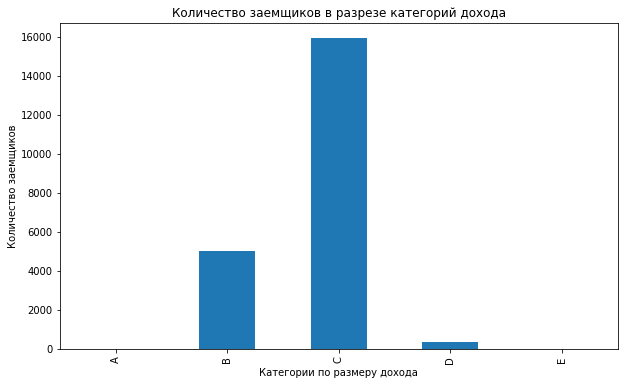

In [39]:
# выводим количество заемщиков в зависимости от категории дохода
fig, ax = plt.subplots(figsize=(10,6))
total_income_category_pivot.sort_index()['total'].plot.bar()
ax.set_title('Количество заемщиков в разрезе категорий дохода')
ax.set_xlabel('Категории по размеру дохода')
ax.set_ylabel('Количество заемщиков')
plt.show()

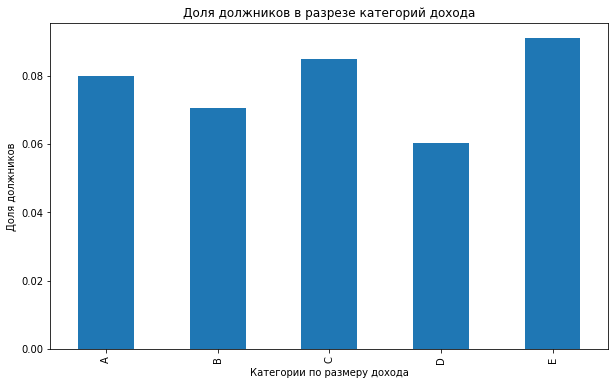

In [40]:
# выводим количество заемщиков в зависимости от категории дохода
fig, ax = plt.subplots(figsize=(10,6))
total_income_category_pivot.sort_index()['share_of_debtors'].plot.bar()
ax.set_title('Доля должников в разрезе категорий дохода')
ax.set_xlabel('Категории по размеру дохода')
ax.set_ylabel('Доля должников')
plt.show()

**Вывод:** 

Наиболее значимыми являются группы с доходами `'B'` от 200 001 – 1 000 000 и `'C'` от 50 001 до - 200 000 так как суммарно они составляют 98% от общего числа заемщиков.

- более надежной выступает категория дохода `'B'` от 200 001 – 1 000 000, у которой процент возникновения задолженностей около `7%`. 


- хуже возвращают кредиты клиенты со средними доходами `'C'` от 50 001 до - 200 000, у которых `9%` случаев задолженности.


- хотя лучший показатель возврата кредита в срок отмечен у клиентов с категорией дохода `'D'` от 30001 до 50000, у которых `6%` задолженностей, но в этой группе относительно малое количество клиентов.

**Наиболее привлекательными клиентами, чаще других возвращающими кредиты в срок, являются клиенты из категории `'B'` с доходами от 200 001 до 1 000 000.**


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Ранее мы выделили следующие категории целей взятия кредита:

In [41]:
# посмотрим категории целей, по которым берут кредит
print(data['purpose_category'].unique())

['операции с недвижимостью' 'операции с автомобилем'
 'получение образования' 'проведение свадьбы']


Для каждой категории посчитаем долю клиентов, имевших задолженность:

In [42]:
# находим доли задолженностей в разбивке по целям кредита
purpose_category_pivot = create_pivot_table(data, 'purpose_category')

In [43]:
# выводим информацию
display_debt_pivot(purpose_category_pivot)

,Всего заемщиков,Всего должников,Доля должников
purpose_category,,,
операции с недвижимостью,10751,780,7.26%
проведение свадьбы,2313,183,7.91%
получение образования,3988,369,9.25%
операции с автомобилем,4279,400,9.35%


**Вывод:** 

Лучше всего возвращают в срок кредиты на недвижимость, в этой категории процент задолженности составляет `7,2%`.

Хуже всего дело обстоит в категориях "получение образование" и "операции с автомобилем", в которых процент задолженности достигает `9,3%`, что примерно на 2 процентных пункта уступает лидеру.

Средний результат показывает категория "проведение свадьбы" с `7,9%` задолженности.

Видимо риск потери недвижимости в случае просрочки по ипотеке делает наиболее дисциплинированными заёмщиков в этой категории. 


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Причинами пропусков в данных могут быть:
- ошибки ввода данных
- сокрытие информации
- мошеннические действия
- технические ошибки при сохранении, передаче, смене формата данных.

Ошибки, в том числе те, из-за которых возникают пропуски в данных можно разделить на две большие группы: вызванные человеческим фактором и технологические.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Важным свойством количественных переменных является возможность их сравнения между собой. Чтобы пропуски в количественных переменных не влияли негативно на возможность сравнения и анализа данных, их заполняют характерными значениями для выборки. Для заполнения пропусков можно использовать среднее или медианное значение. Медианное значение позволяет более корректно харектиризовать данные, в которых есть отклонения, то есть когда некоторые значения в выборке сильно отличаются от других, так как в этом случае среднее арифметическое может сильно отклониться вслед за единичными выбросами в данных. 

### Шаг 4: общий вывод.

**Краткий обзор**

Провели исследование о наличии зависимости между сроком возврата кредита и различными параметрами клиента - семейным положением, количеством детей, уровнем дохода, а также зависимости между сроком возврата и целями кредита.

Получив данные для анализа, предварительно оценили их корректность и полноту. Выявили наличие пустых значений в двух колонках: ежемесячный доход и трудовой стаж, и заполнили их медианными значеними в зависимости от типа занятости. Также выявили аномальные значения в столбцах "количество детей" и "общий трудовой стаж" в днях, и устранили их, заменив отрицательные значения в трудовом стаже положительными, и удалив строки с аномальными значениями в количестве детей. Затем удалили дубликаты строк. И в завершении подготовки данных, выделили категории клиентов по величине дохода и по целям кредита, которые нужны для возможности нахождения ответов на поставленные вопросы.

Для каждого параметра подсчитали долю заёмщиков, у которых была задолженность, и сравнивая долю просроченных платежей, сделали следующие заключения. 

**Главные выводы**

Факт погашения кредита в срок имеет зависимость от каждого из рассмотренных факторов:
- заемщики, у которых нет детей, возвращают кредит в срок чаще, чем заёмщики с детьми;
- заёмщики в статусах "вдовец/вдова" и "в разводе" реже других допускают появление задолженности, а чаще других не возвращают кредит в срок неженатые/незамужние и живущие в гражданском браке;
- хуже возвращают кредиты клиенты со средними доходами 'C' от 50 001 до - 200 000 и с самыми низкими доходами 'E' от 0 до 30 000, а лучше с категориями 'D' от 30001 до 50000 и 'B' от 200 001 – 1 000 000;
- наименьший процент задолженностей для кредитов на недвижимость, а наибольший для категорий "получение образование" и "операции с автомобилем"

*Получается, что наиболее дисциплинированный заёмщик, это человек без детей, в разводе или овдовевший, взявший кредит на недвижимость, и имеющий либо повышенный доход от 200 001 – 1 000 000 либо доход от от 30001 до 50000.*

*Наибольший риск возникновения задолженностей будет у клиента с детьми, который не женат или живёт в гражданском браке, берёт кредит на образование или покупку автомобиля, и имеет средний или низкий доход.*


**Рекомендации**

При построении модели кредитного скоринга следует использовать все рассмотренные параметры. Можно  выполнить укрупнение некоторых групп, например, объединив категории с 3, 4 и 5 детьми в одну ("многодетные"), так как количество семей с 4 и 5 детьми на порядки меньше других, а также объединить категории "вдовец/вдова" и "в разводе", так как они очень близки по доле возникновения случаев задолженности.